## Sim Demo

### Imports

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from env.imports import *

In [20]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run) 

<module 'sim.sim_run' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim_run.py'>

#### Check job specs

In [21]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 7.9%
RAM Usage: 14.0%
Available RAM: 323.3G
Total RAM: 376.0G
52.4G


In [22]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: Tesla V100-SXM2-32GB - Memory Allocated: 0.02 GB


In [23]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |


In [24]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

### Model Parameter Counts

#### **Linear Models**
- **PCA Bilinear:** 730  _(27 PCs)_
- **PLS Bilinear:** 101  _(10 PLS components)_
- **Bilinear Low-rank:** 73,800  _(rank 10)_
- **PLS MLP:** 158,993  _(10 PLS components, including PLS projection matrices)_
- **PCA MLP:** 47,873  _(27 PCs, 2-layer)_

---

#### **MLP and SMT Models**

#### 2-Layer Models
- **MLP:** 3,812,609
- **SMT:** 1,399,947
- **MLP w/ CLS:** 3,814,145
- **SMT w/ CLS:** 1,405,579

#### 3-Layer Models
- **MLP:** 7,723,777
- **SMT:** 2,162,315
- **MLP w/ CLS:** 7,726,849
- **SMT w/ CLS:** 2,173,067

---

### Coord MLP Parameter Counts
- **[32]:** 321
- **[64, 32]:** 2,753
- **[128, 64]:** 9,601
- **[256, 128]:** 35,685
- **[512, 256, 128]:** 169,729

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
Network coverage: 100.0% of regions
Network sizes: [113, 113, 113, 116]
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: wcrqudhp
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/wcrqudhp
Initialized sweep with ID: wcrqudhp
2
3
4


wandb: Agent Starting Run: nzj2mdts with config:
wandb: 	batch_size: 512
wandb: 	binarize: False
wandb: 	epochs: 100
wandb: 	input_dim: 14760
wandb: 	learning_rate: 0.003
wandb: 	max_iter: 1000
wandb: 	n_components: 30
wandb: 	optimize_encoder: False
wandb: 	scale: True
wandb: 	weight_decay: 0.001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0


  gc.collect()



X_train shape: torch.Size([229, 7380])
Y_train shape: torch.Size([229, 229])


  warnings.warn(



Total number of parameters: 443701
Processing inner fold 1
Processing inner fold 2


  from IPython.core.display import HTML, display  # type: ignore



wandb: Agent Starting Run: gb8rwxup with config:
wandb: 	batch_size: 512
wandb: 	binarize: False
wandb: 	epochs: 100
wandb: 	input_dim: 14760
wandb: 	learning_rate: 0.003
wandb: 	max_iter: 1000
wandb: 	n_components: 25
wandb: 	optimize_encoder: False
wandb: 	scale: True
wandb: 	weight_decay: 0.1
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0


  gc.collect()



X_train shape: torch.Size([229, 7380])
Y_train shape: torch.Size([229, 229])


  warnings.warn(



Total number of parameters: 369626
Processing inner fold 1
Processing inner fold 2


  from IPython.core.display import HTML, display  # type: ignore



wandb: Sorting runs by +summary_metrics.mean_val_loss


BEST CONFIG {'scale': True, 'epochs': 100, 'binarize': False, 'max_iter': 1000, 'input_dim': 14760, 'batch_size': 512, 'n_components': 30, 'weight_decay': 0.001, 'learning_rate': 0.003, 'optimize_encoder': False}
X_train shape: torch.Size([342, 7380])
Y_train shape: torch.Size([342, 342])


  warnings.warn(

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Total number of parameters: 443701


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Running train evaluation...

=== TRAIN EVALUATION ===
Evaluating 342 regions, 116622 connections


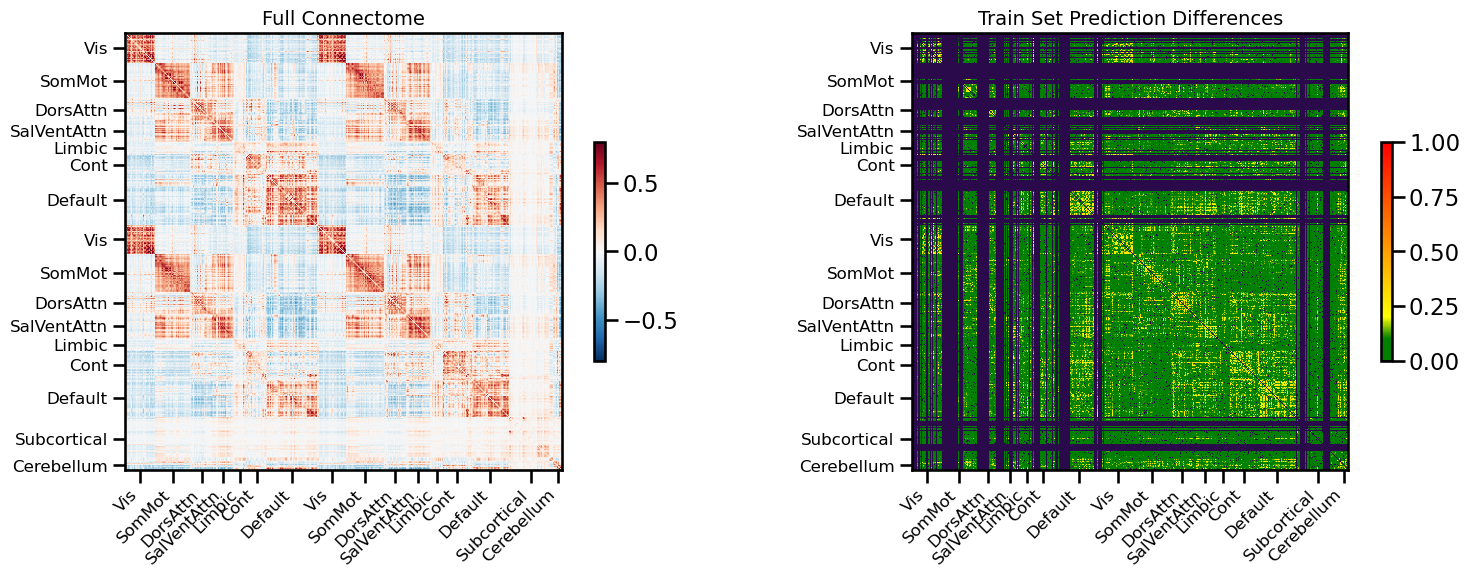

<Figure size 640x480 with 0 Axes>

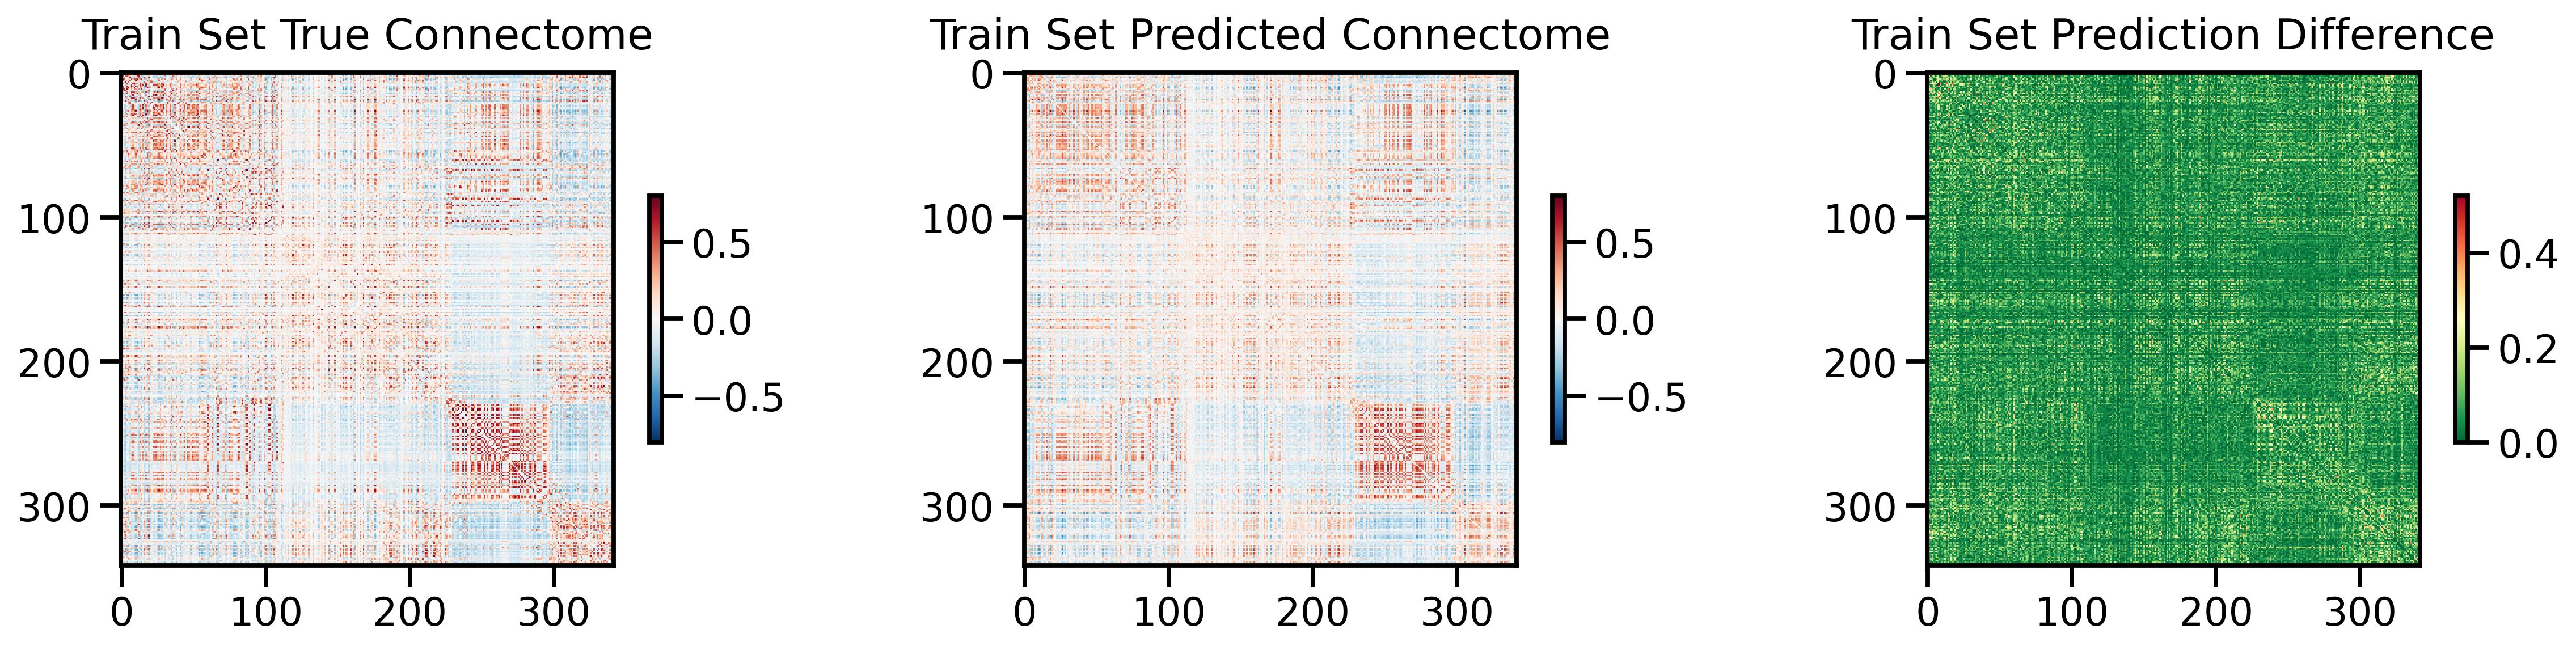

  return iter(self.unbind(0))



<Figure size 640x480 with 0 Axes>

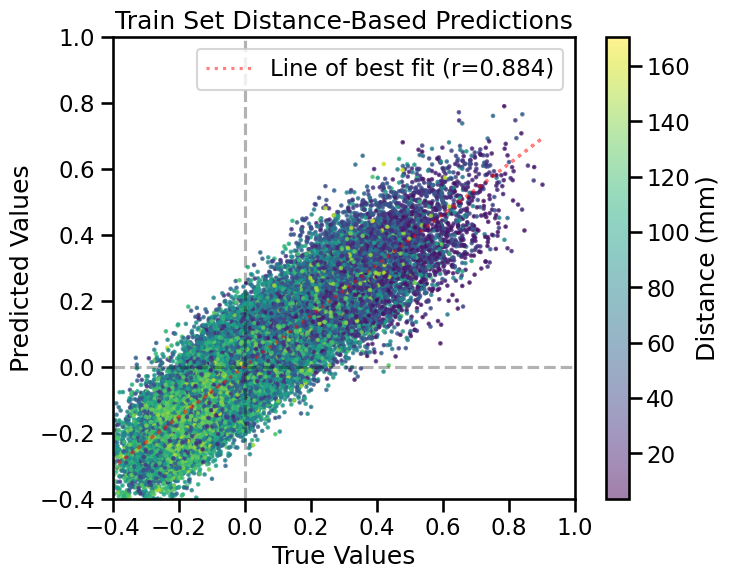

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 113 regions, 12656 connections


<Figure size 640x480 with 0 Axes>

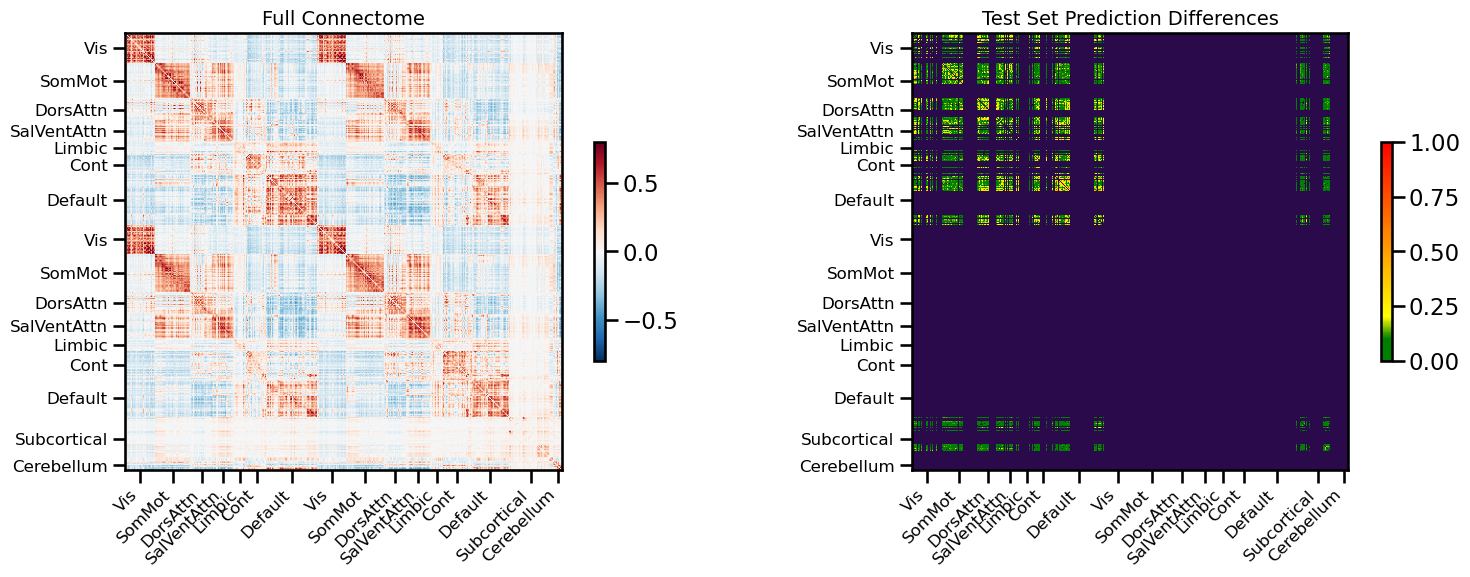

<Figure size 640x480 with 0 Axes>

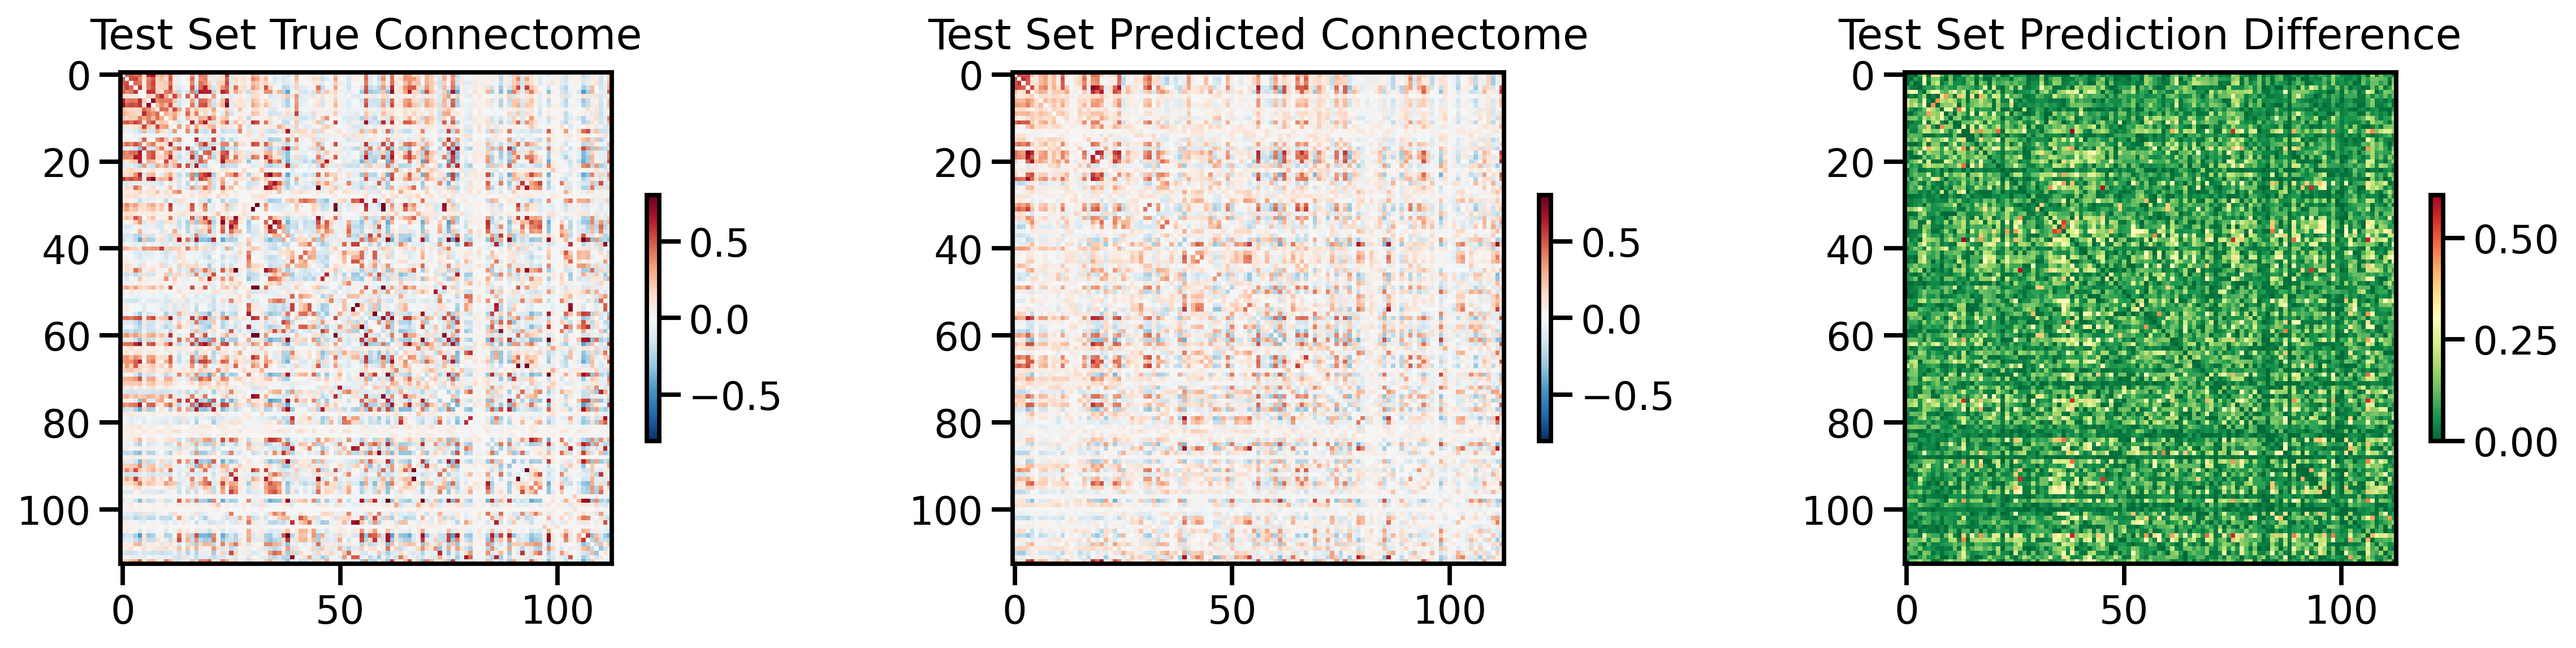

<Figure size 640x480 with 0 Axes>

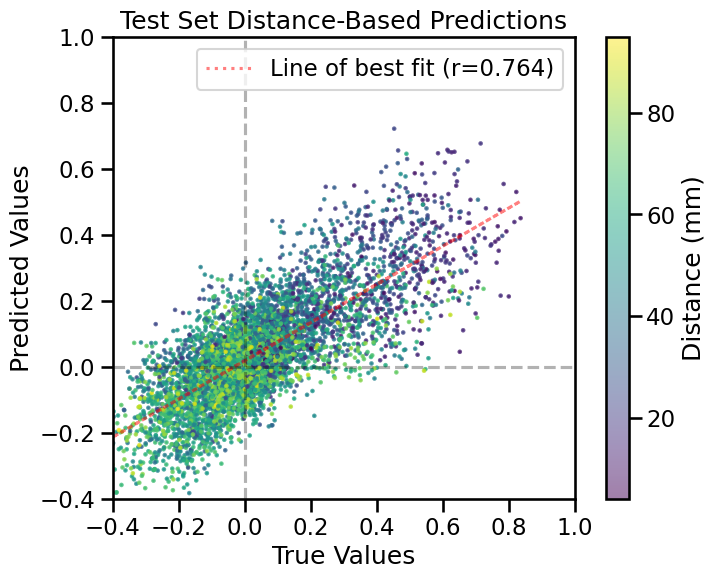

TRAIN METRICS
GLOBAL: mse=0.007334, mae=0.063921, r2=0.7807, pearson_r=0.8837, spearman_r=0.8671, geodesic_distance=18.1399
DISTANCE-BASED: short=0.8960, mid=0.8512, long=0.8598
HEMISPHERIC: left=0.8963, right=0.8832, inter=0.8867
CONNECTION STRENGTH: neg=0.2636, weak=0.8265, pos=0.5467
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.7360    0.8361
  Default       0.8027    0.8346
  SalVentAttn    0.7624    0.8669
  Limbic        0.6740    0.7898
  DorsAttn      0.7294    0.8571
  SomMot        0.6480    0.8809
  Vis           0.7468    0.7605
  Subcortical    0.8314    0.6985
  Cerebellum    0.7838    0.8555

TEST METRICS
GLOBAL: mse=0.016677, mae=0.096448, r2=0.5833, pearson_r=0.7638, spearman_r=0.7234, geodesic_distance=11.0623
DISTANCE-BASED: short=0.7769, mid=0.6567
HEMISPHERIC: left=0.7638
CONNECTION STRENGTH: neg=0.2684, weak=0.6525, pos=0.3728
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  -----------------------

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 7.7%
RAM Usage: 17.6%
Available RAM: 309.9G
Total RAM: 376.0G
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |
Sim complete
Simulation completed in 80.85 seconds (1.35 minutes)


0

<Figure size 640x480 with 0 Axes>

In [25]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='spatial',
              random_seed=1,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=False,
              model_type='pls_bilineardecoder',
              use_gpu=True, 
              null_model='none',
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()